In [63]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import scipy
import klib
import geopandas as gpd
import pycountry

In [64]:
# Hi there, and I am excited to present a rocket project that I completed. For this project, I designed and built a functional model rocket from scratch. 
# It was a challenging project, but I was able to successfully launch and recover the rocket.

#T hroughout the project, I utilized various skills including engineering design, physics, and project management. I started by researching and planning the rocket design, taking into consideration factors such as size, weight, and materials.
# I then assembled the rocket, which involved constructing the body, fins, and nosecone, as well as installing the engine.

# The launch itself was a thrilling experience. 
# I carefully followed safety protocols and made sure the rocket was properly positioned on the launch pad. I 
# Ignited the engine and watched as the rocket soared into the sky, reaching an impressive altitude before descending safely back to the ground with the help of a parachute.

#Overall, this project challenged me to apply my knowledge and skills in a practical way, and I am proud of what I accomplished. I believe this project showcases my creativity, problem-solving abilities, and attention to detail, and I am excited to share it with others through my portfolio.


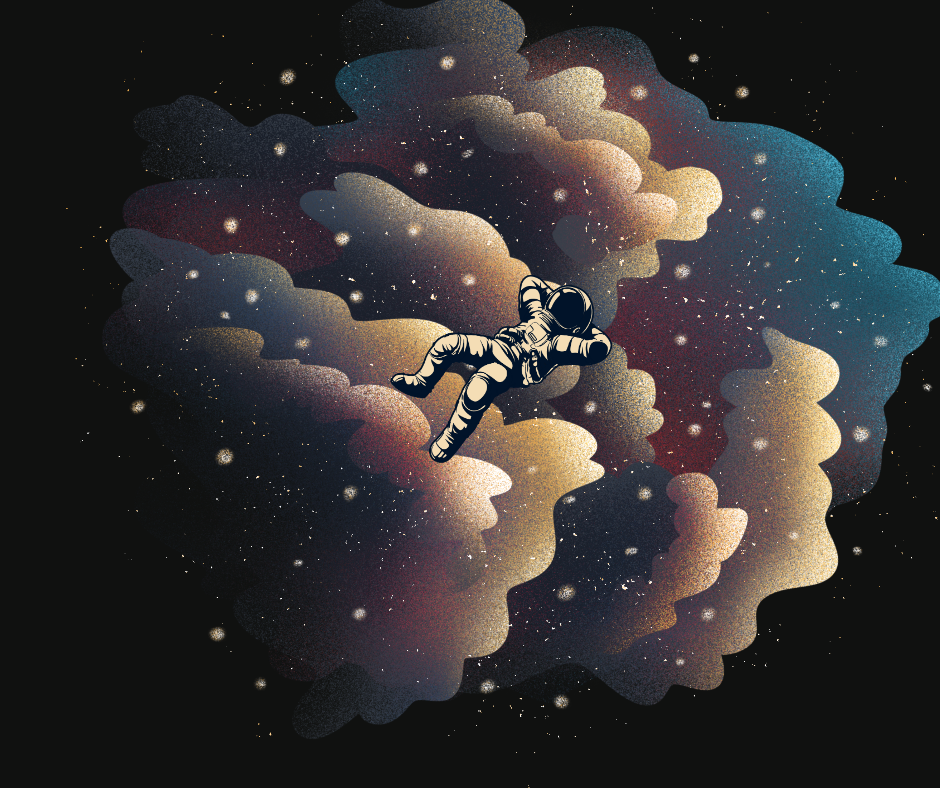


## Space eXploration  by Diego Brito

## Initial Data 

In [65]:
# reading the database
df = pd.read_csv('mission_launches.csv')
# data displaying 

display(df.head(18))

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


## Preliminary Data Exploration

In [66]:
# checking general aspects od dataset
df.shape, df.info


((4324, 9),
 <bound method DataFrame.info of       Unnamed: 0.1  Unnamed: 0 Organisation  \
 0                0           0       SpaceX   
 1                1           1         CASC   
 2                2           2       SpaceX   
 3                3           3    Roscosmos   
 4                4           4          ULA   
 ...            ...         ...          ...   
 4319          4319        4319      US Navy   
 4320          4320        4320         AMBA   
 4321          4321        4321      US Navy   
 4322          4322        4322    RVSN USSR   
 4323          4323        4323    RVSN USSR   
 
                                                Location  \
 0            LC-39A, Kennedy Space Center, Florida, USA   
 1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
 2                         Pad A, Boca Chica, Texas, USA   
 3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
 4              SLC-41, Cape Canaveral AFS, Florida, USA   
 ...              

In [67]:
df.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


GridSpec(6, 6)

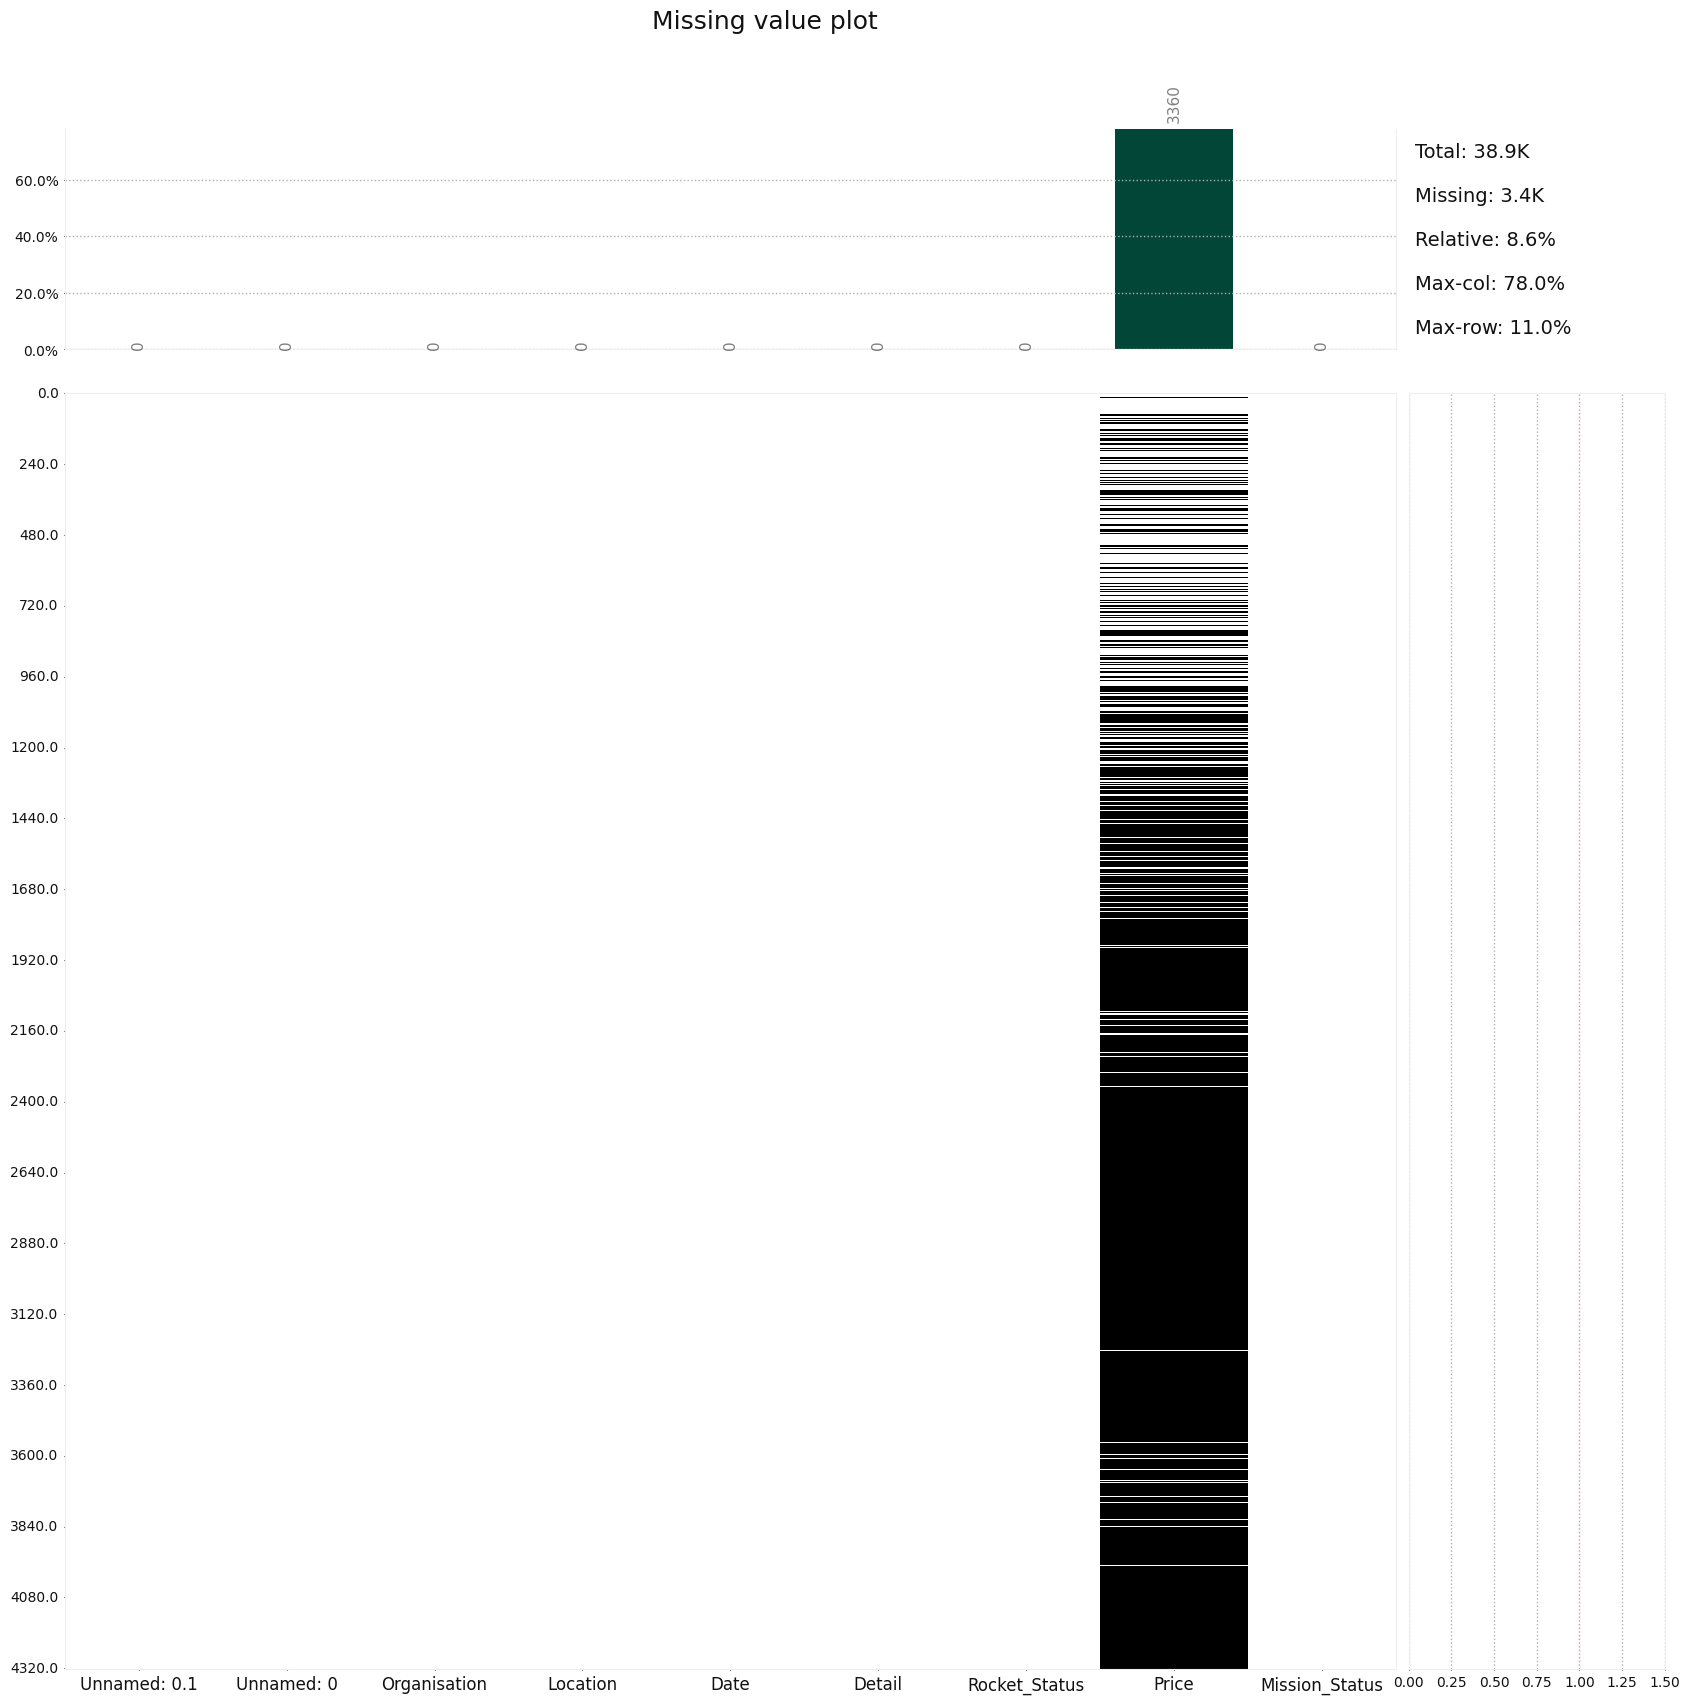

In [68]:
# lets visualize the issues of missiing data
klib.missingval_plot(df)


## Data cleaning

![data cleaning.png](attachment:data cleaning.png)

In [69]:
# There are a realtively no heavy issues with the data,  altough missing values, duplicates and trash are a constant
#lets star to clean the data
df = klib.data_cleaning(df)

Shape of cleaned data: (4324, 9) - Remaining NAs: 3360


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.16 MB (-53.33%)



In [70]:
df = klib.clean.clean_column_names(df)
df = klib.clean.drop_missing(df)
display(df)

,unnamed_0_1,unnamed_0,organisation,location,date,detail,rocket_status,price,mission_status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [71]:
# Data types are not quite easy to deal in the current format..lets change it
df = klib.clean.convert_datatypes(df)
df.dtypes

unnamed_0_1          int16
unnamed_0            int16
organisation      category
location            string
date                string
detail              string
rocket_status     category
price             category
mission_status    category
dtype: object

In [72]:
# there are columns with names erros, probably form previous importing and saving, wich creat a new column based on index
df = df.drop(columns=["unnamed_0","detail"])
df = df.rename(columns={'unnamed_0_1': 'launches'})

In [73]:
# data sems to be clean, lets start to explore it
display(df["location"].head(28))

0            LC-39A, Kennedy Space Center, Florida, USA
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                         Pad A, Boca Chica, Texas, USA
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan
4              SLC-41, Cape Canaveral AFS, Florida, USA
5          LC-9, Taiyuan Satellite Launch Center, China
6            Site 31/6, Baikonur Cosmodrome, Kazakhstan
7       LC-101, Wenchang Satellite Launch Center, China
8              SLC-40, Cape Canaveral AFS, Florida, USA
9                LA-Y1, Tanegashima Space Center, Japan
10        LP-0B, Wallops Flight Facility, Virginia, USA
11      Site 95, Jiuquan Satellite Launch Center, China
12         LC-3, Xichang Satellite Launch Center, China
13                     Pad 1, Palmachim Airbase, Israel
14    Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
15      Rocket Lab LC-1A, M?hia Peninsula, New Zealand
16         LC-9, Taiyuan Satellite Launch Center, China
17             SLC-40, Cape Canaveral AFS, Flori

## Data featuring

![data featuring.png](attachment:data featuring.png)

In [74]:
# Other issue is too many missing values, we haveo to decide wich way to go 1- drop, 2- fill with 0, with with other metric
# Inor der to make a data driven decision, lets first check how bad missing data on prices is 
percent_missing = df['price'].isnull().mean() * 100
print(f'Percentage of missing values in my_column: {percent_missing}%')


Percentage of missing values in my_column: 77.70582793709528%


In [75]:
# The output of missing values is astonishing... normally we would drop this column and proceed with other criteria
#Altough, for our particular case price is crucial, so we have to make the best we can out of it, lets go with mean
# "price" is a categorical column , so we might change it to int
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'] = df['price'].fillna(df['price'].mean()).astype(int)



In [76]:
# cheking location column to tiddy data
def get_country(location):
    for country in pycountry.countries:
        if country.name.lower() in location.lower():
            return country.name
    return None
# Check frequency of each location
location_counts = df['location'].value_counts()

# Get the locations that appear only once
unique_locations = location_counts[location_counts == 1].index.tolist()
display(location_counts)


Site 31/6, Baikonur Cosmodrome, Kazakhstan           235
Site 132/1, Plesetsk Cosmodrome, Russia              216
Site 43/4, Plesetsk Cosmodrome, Russia               202
Site 41/1, Plesetsk Cosmodrome, Russia               198
Site 1/5, Baikonur Cosmodrome, Kazakhstan            193
                                                    ... 
LC-576A1, Vandenberg AFB, California, USA              1
Santa Rita 2, San Marco Launch Platform, Kenya         1
Xichang Satellite Launch Center, China                 1
LC-18B, Cape Canaveral AFS, Florida, USA               1
K-496 Submarine, Barents Sea Launch Area, Bare...      1
Name: location, Length: 137, dtype: Int64

In [77]:
# The code above creates a new column called 'country' by applying the get_country function to the 'location' column. The get_country function takes the 'location' column, which has a country name and a state name, and returns the country name. It does this by splitting the 'location' column on the comma (',') and returning the first element of the resulting list.

df['country'] = df['location'].apply(get_country)

df.drop('location', axis=1, inplace=True)

In [78]:
# Some categorical data need to be turned into numerical - starting mission_status
#lets use a simple strategy, 1 for success, 0 for failure or even booleans might work 
df_test = pd.get_dummies(df['mission_status'])
df_test

,Failure,Partial Failure,Prelaunch Failure,Success
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
4319,1,0,0,0
4320,0,0,0,1
4321,1,0,0,0
4322,0,0,0,1


In [79]:
df = pd.concat([df, df_test], axis=1).reindex(df.index)

In [80]:
df.drop('mission_status', axis=1, inplace=True)

In [81]:
# now lets try the same with rocket status
df_test = pd.get_dummies(df['rocket_status'])
df = pd.concat([df, df_test], axis=1).reindex(df.index)
df.drop('rocket_status', axis=1, inplace=True)
display(df.head(18))

,launches,organisation,date,price,country,Failure,Partial Failure,Prelaunch Failure,Success,StatusActive,StatusRetired
0,0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",50,None,0,0,0,1,1,0
1,1,CASC,"Thu Aug 06, 2020 04:01 UTC",29,China,0,0,0,1,1,0
2,2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",129,None,0,0,0,1,1,0
3,3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",65,Kazakhstan,0,0,0,1,1,0
4,4,ULA,"Thu Jul 30, 2020 11:50 UTC",145,None,0,0,0,1,1,0
5,5,CASC,"Sat Jul 25, 2020 03:13 UTC",64,China,0,0,0,1,1,0
6,6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",48,Kazakhstan,0,0,0,1,1,0
7,7,CASC,"Thu Jul 23, 2020 04:41 UTC",129,China,0,0,0,1,1,0
8,8,SpaceX,"Mon Jul 20, 2020 21:30 UTC",50,None,0,0,0,1,1,0
9,9,JAXA,"Sun Jul 19, 2020 21:58 UTC",90,Japan,0,0,0,1,1,0


In [82]:
# as a mattter of fact paritual failures and failurs during the process are all failures, so lets change it
df.drop('Partial Failure', axis=1, inplace=True)
df.drop('Prelaunch Failure', axis=1, inplace=True)
display(df.head(18))

,launches,organisation,date,price,country,Failure,Success,StatusActive,StatusRetired
0,0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",50,None,0,1,1,0
1,1,CASC,"Thu Aug 06, 2020 04:01 UTC",29,China,0,1,1,0
2,2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",129,None,0,1,1,0
3,3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",65,Kazakhstan,0,1,1,0
4,4,ULA,"Thu Jul 30, 2020 11:50 UTC",145,None,0,1,1,0
5,5,CASC,"Sat Jul 25, 2020 03:13 UTC",64,China,0,1,1,0
6,6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",48,Kazakhstan,0,1,1,0
7,7,CASC,"Thu Jul 23, 2020 04:41 UTC",129,China,0,1,1,0
8,8,SpaceX,"Mon Jul 20, 2020 21:30 UTC",50,None,0,1,1,0
9,9,JAXA,"Sun Jul 19, 2020 21:58 UTC",90,Japan,0,1,1,0


<AxesSubplot:xlabel='price', ylabel='Density'>

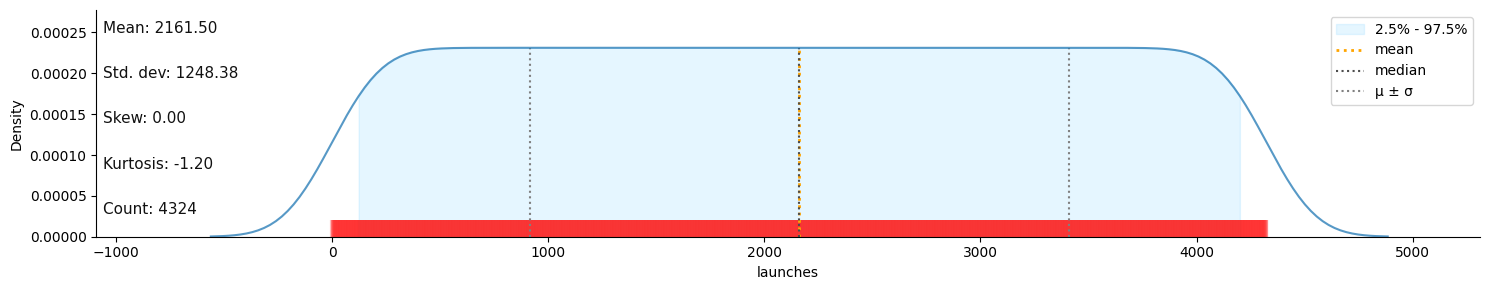

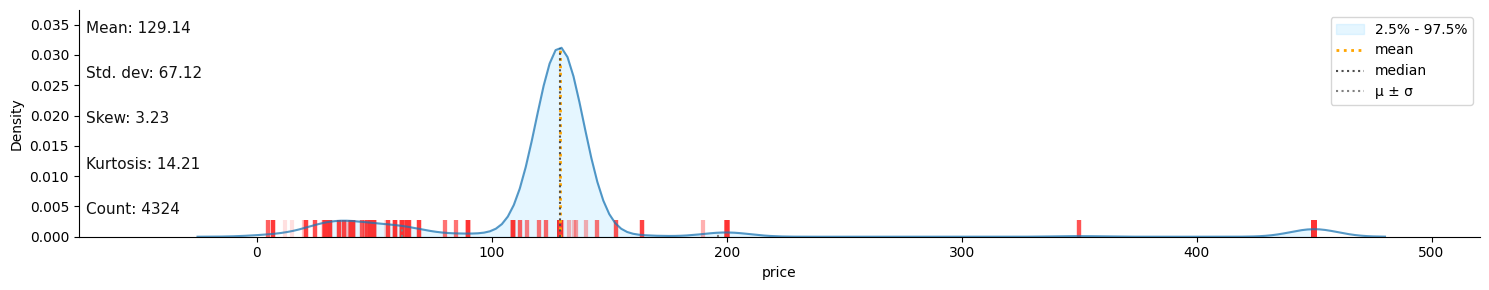

In [83]:
# With ths plot we can see that the distribution of data is not normal, and we have a lot of outliers
klib.dist_plot(df)


In [84]:
# drop the rows where the country name is None
df.dropna(subset=['country'], inplace=True)
display(df.head(18))


,launches,organisation,date,price,country,Failure,Success,StatusActive,StatusRetired
1,1,CASC,"Thu Aug 06, 2020 04:01 UTC",29,China,0,1,1,0
3,3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",65,Kazakhstan,0,1,1,0
5,5,CASC,"Sat Jul 25, 2020 03:13 UTC",64,China,0,1,1,0
6,6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",48,Kazakhstan,0,1,1,0
7,7,CASC,"Thu Jul 23, 2020 04:41 UTC",129,China,0,1,1,0
9,9,JAXA,"Sun Jul 19, 2020 21:58 UTC",90,Japan,0,1,1,0
11,11,ExPace,"Fri Jul 10, 2020 04:17 UTC",28,China,1,0,1,0
12,12,CASC,"Thu Jul 09, 2020 12:11 UTC",29,China,0,1,1,0
13,13,IAI,"Mon Jul 06, 2020 01:00 UTC",129,Israel,0,1,1,0
14,14,CASC,"Sat Jul 04, 2020 23:44 UTC",29,China,0,1,1,0


In [85]:
# it seemns that data is clean, lets start to explore it in correlation with price, status, finding insights about aspects unseen etc.

In [86]:
# Load GeoJSON file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## Data viasualization  

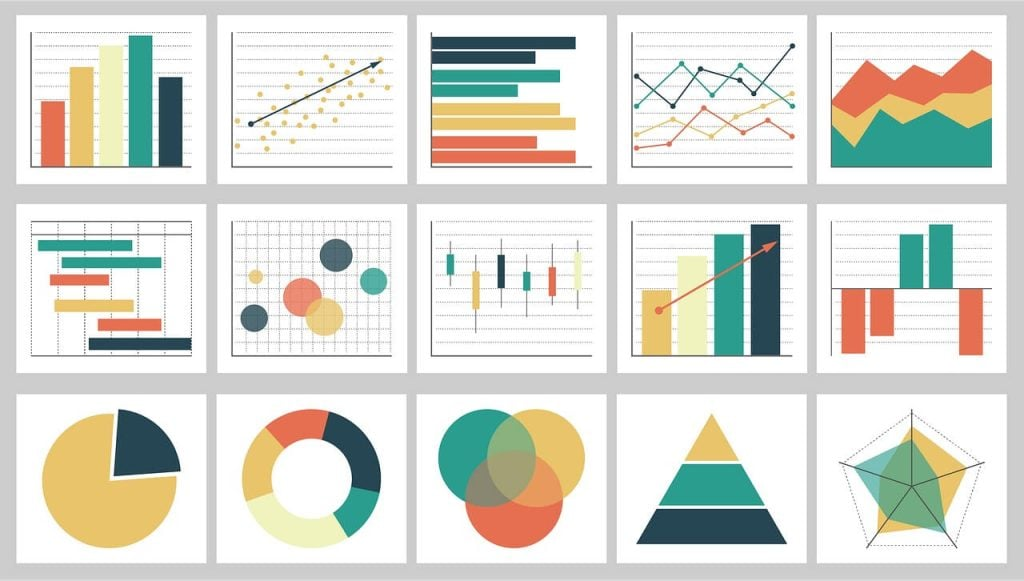

In [87]:
#in order to performe some data visualization it is better to set some data from bools to numerical
# map True to 1 and False to 0 for each of the boolean columns
# replace True with 1 and False with 0 for each of the boolean columns
df.replace({True: 1, False: 0}, inplace=True)

In [88]:
display(df.head(28))

,launches,organisation,date,price,country,Failure,Success,StatusActive,StatusRetired
1,1,CASC,"Thu Aug 06, 2020 04:01 UTC",29,China,0,1,1,0
3,3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",65,Kazakhstan,0,1,1,0
5,5,CASC,"Sat Jul 25, 2020 03:13 UTC",64,China,0,1,1,0
6,6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",48,Kazakhstan,0,1,1,0
7,7,CASC,"Thu Jul 23, 2020 04:41 UTC",129,China,0,1,1,0
9,9,JAXA,"Sun Jul 19, 2020 21:58 UTC",90,Japan,0,1,1,0
11,11,ExPace,"Fri Jul 10, 2020 04:17 UTC",28,China,1,0,1,0
12,12,CASC,"Thu Jul 09, 2020 12:11 UTC",29,China,0,1,1,0
13,13,IAI,"Mon Jul 06, 2020 01:00 UTC",129,Israel,0,1,1,0
14,14,CASC,"Sat Jul 04, 2020 23:44 UTC",29,China,0,1,1,0


Setting the figure and the two plots
Adjusting the spacing between subplots
Setting the first plot
Customizing ax0
Setting the second plot
Customizing ax1
Show the plot


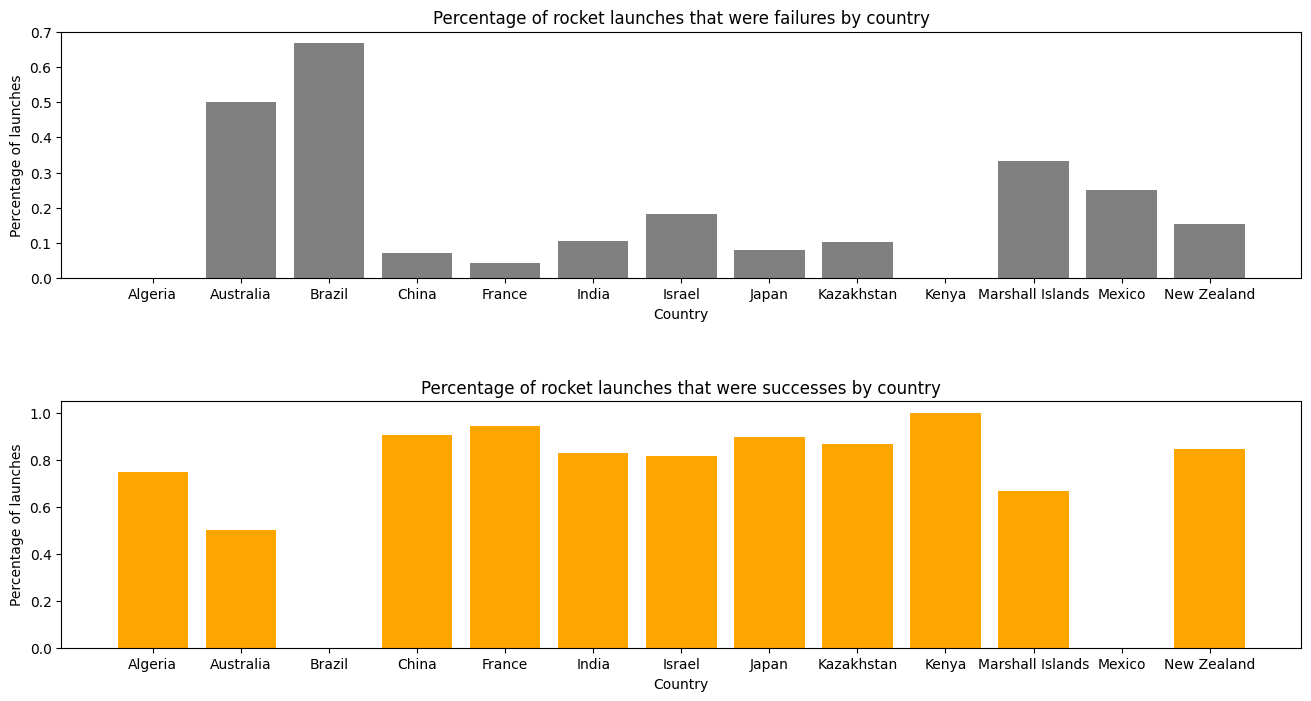

In [89]:

# Group data by location and count the number of rockets launched in each country that were failures
grouped_per_country_failures = df.groupby("country")["Failure"].mean().reset_index(name="mean_failures")
grouped_per_country_successes = df.groupby("country")["Success"].mean().reset_index(name="mean_successes")

# Setting the figure and the two plots
print("Setting the figure and the two plots")
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
                               
# Adjusting the spacing between subplots
print("Adjusting the spacing between subplots")
plt.subplots_adjust(hspace=0.5)

# Setting the first plot
print("Setting the first plot")
bar = ax0.bar(x=grouped_per_country_failures["country"], height=grouped_per_country_failures["mean_failures"], color="grey")

# Customizing ax0
print("Customizing ax0")
ax0.set(title="Percentage of rocket launches that were failures by country", xlabel="Country", ylabel="Percentage of launches")

# Setting the second plot
print("Setting the second plot")
bar = ax1.bar(x=grouped_per_country_successes["country"], height=grouped_per_country_successes["mean_successes"], color="orange")

# Customizing ax1
print("Customizing ax1")
ax1.set(title="Percentage of rocket launches that were successes by country", xlabel="Country", ylabel="Percentage of launches")

# Show the plot
print("Show the plot")
plt.show()


In [90]:
display(df)

,launches,organisation,date,price,country,Failure,Success,StatusActive,StatusRetired
1,1,CASC,"Thu Aug 06, 2020 04:01 UTC",29,China,0,1,1,0
3,3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",65,Kazakhstan,0,1,1,0
5,5,CASC,"Sat Jul 25, 2020 03:13 UTC",64,China,0,1,1,0
6,6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",48,Kazakhstan,0,1,1,0
7,7,CASC,"Thu Jul 23, 2020 04:41 UTC",129,China,0,1,1,0
...,...,...,...,...,...,...,...,...,...
4301,4301,RVSN USSR,"Tue Sep 23, 1958 07:40 UTC",129,Kazakhstan,1,0,0,1
4313,4313,RVSN USSR,"Thu May 15, 1958 07:12 UTC",129,Kazakhstan,0,1,0,1
4315,4315,RVSN USSR,"Sun Apr 27, 1958 09:01 UTC",129,Kazakhstan,1,0,0,1
4322,4322,RVSN USSR,"Sun Nov 03, 1957 02:30 UTC",129,Kazakhstan,0,1,0,1


C:\Users\Diego S V de Brito\AppData\Local\Temp\ipykernel_21212\3004551635.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Diego S V de Brito\AppData\Local\Temp\ipykernel_21212\3004551635.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



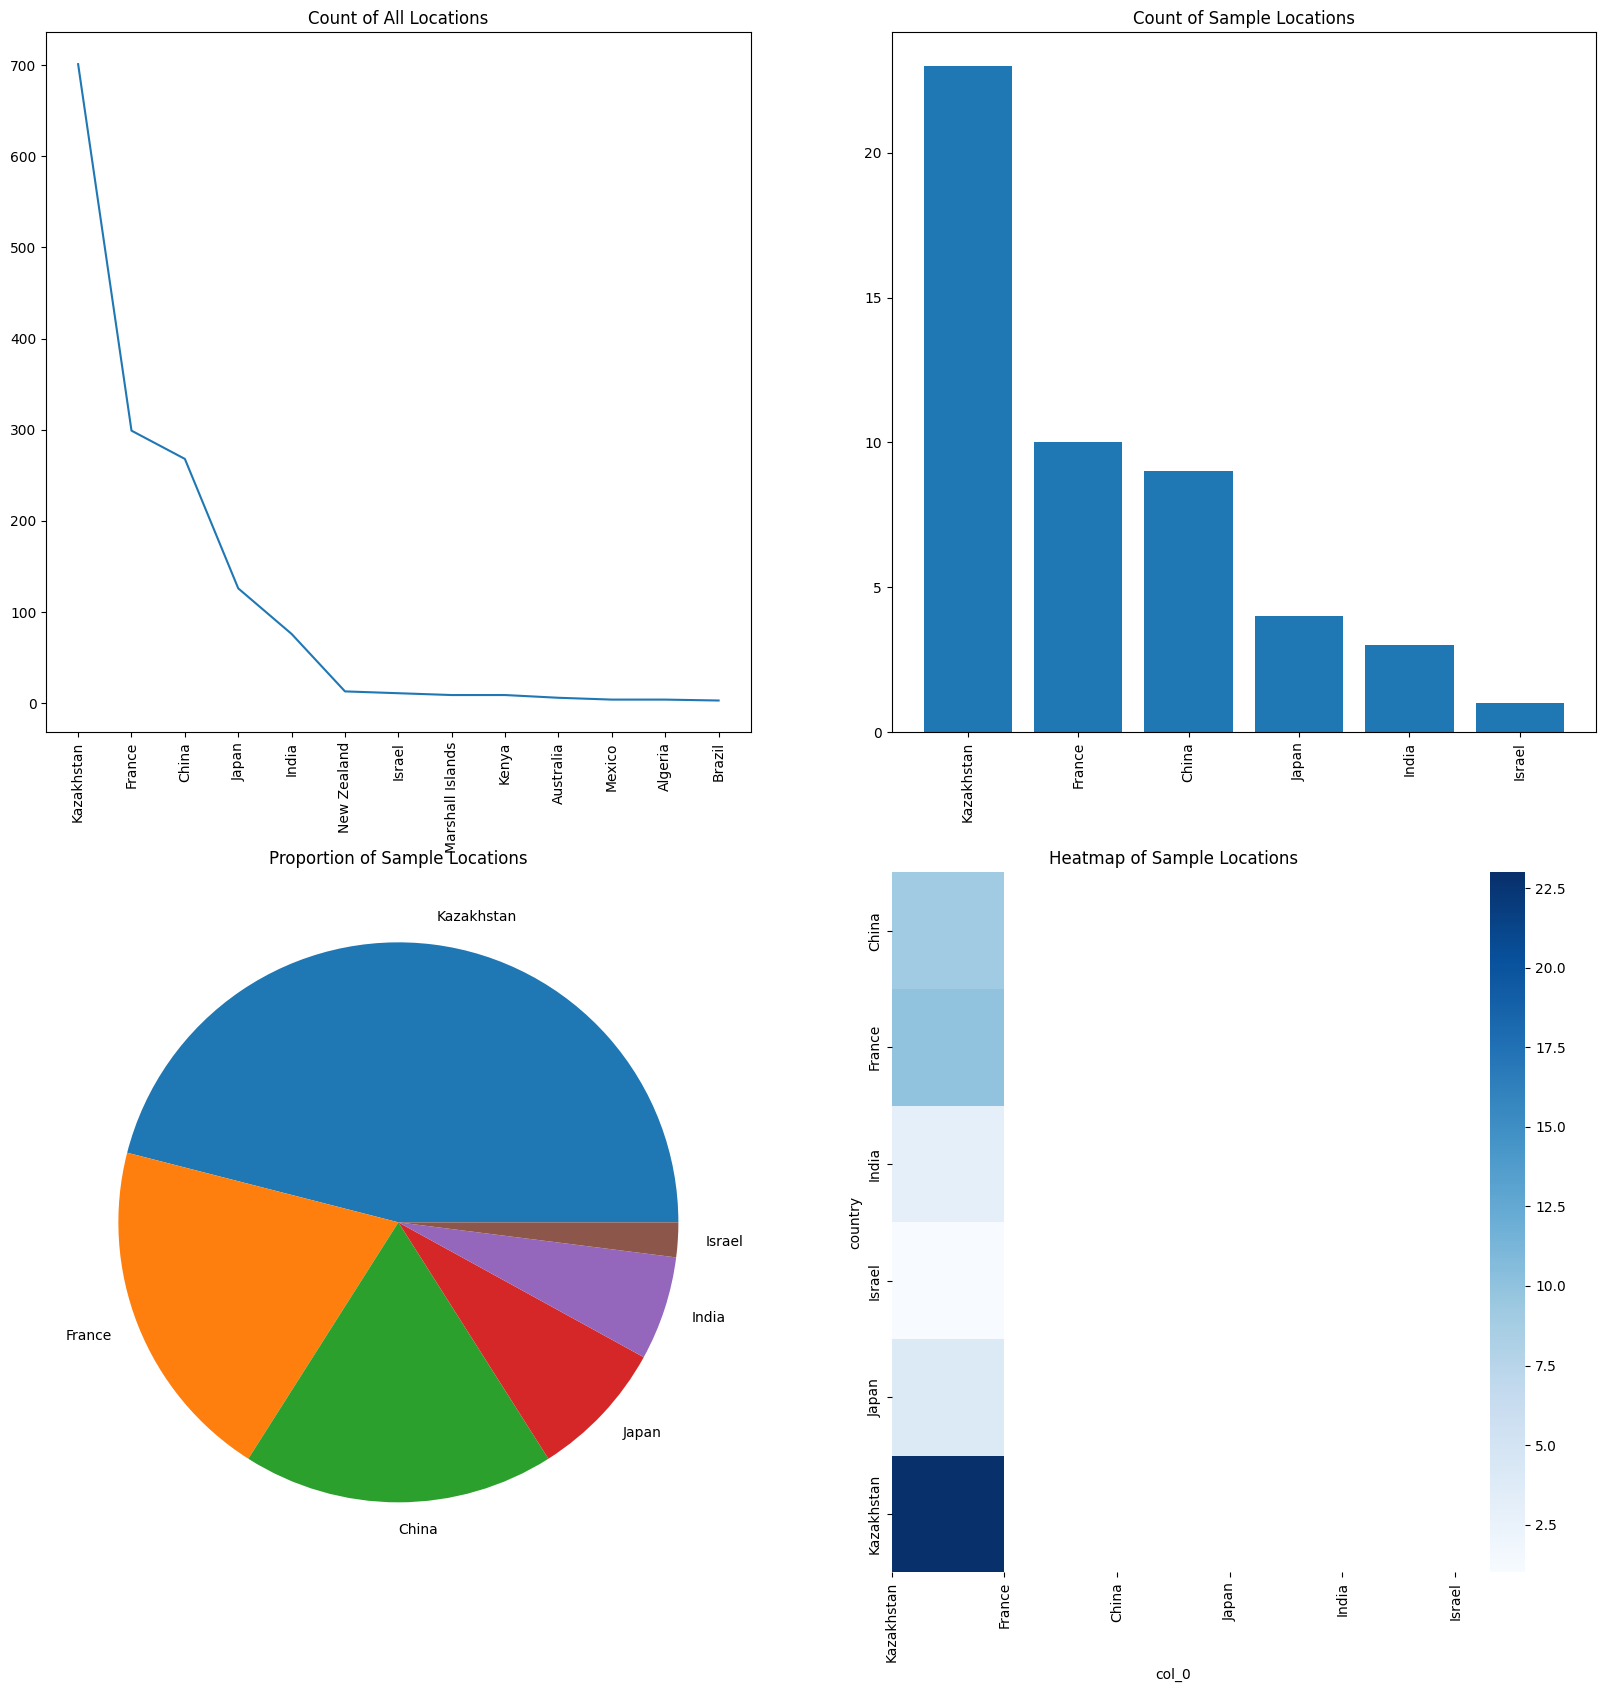

In [118]:
#The following plot is a visualization of the aspects of location and organisation used troughout this project
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig,((ax1,ax2),(ax3,ax4))= plt.subplots(nrows = 2, ncols= 2, figsize = (20,20))

# Get a random sample of 50 locations
sample_locations = df['country'].sample(n=50, random_state=42)

# Plot the count of each location on ax1
ax1.plot(df['country'].value_counts().head(50))

# Bar plot of the sample locations on ax2
ax2.bar(sample_locations.value_counts().index, sample_locations.value_counts().values)

# Pie chart of the sample locations on ax3
ax3.pie(sample_locations.value_counts().values, labels=sample_locations.value_counts().index)

# Heatmap of the sample locations on ax4
sns.heatmap(pd.crosstab(index=sample_locations, columns='count'), cmap='Blues', ax=ax4)

# Set title for each plot
ax1.set_title('Count of All Locations')
ax2.set_title('Count of Sample Locations')
ax3.set_title('Proportion of Sample Locations')
ax4.set_title('Heatmap of Sample Locations')

# Rotate xticks on ax2 and ax3
ax1.set_xticklabels(df['country'].value_counts().index[:50], rotation=90)
ax2.set_xticklabels(sample_locations.value_counts().index[:50], rotation=90)
ax3.legend(labels=sample_locations.value_counts().index[:50], loc="center right", bbox_to_anchor=(1.5, 0.5))
ax4.set_xticks(np.arange(len(sample_locations.value_counts().index[:50])) )
ax4.set_xticklabels(sample_locations.value_counts().index[:50], rotation=90)

# Show the plot
plt.show()



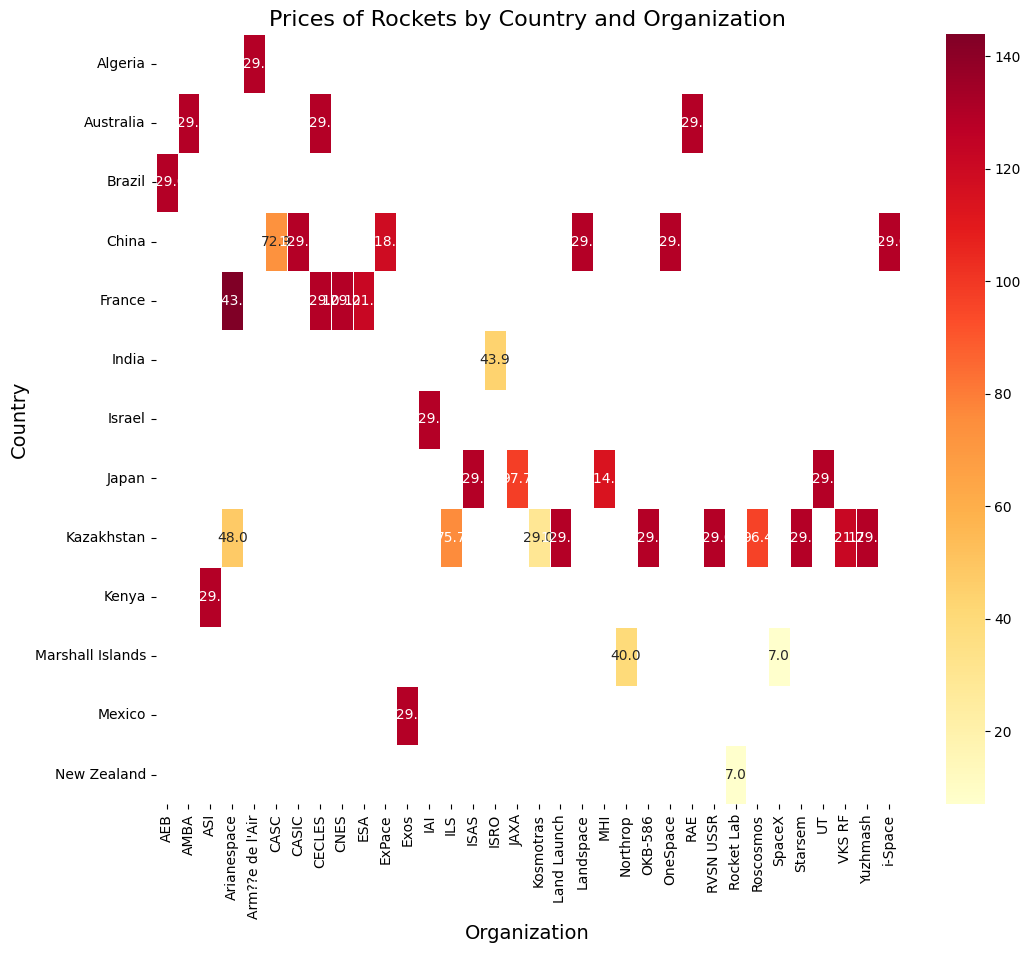

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a matrix of prices for each country-organization combination
price_matrix = df.pivot_table(values='price', index='country', columns='organisation')

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(price_matrix, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=.5, ax=ax)

# Set title and axis labels
ax.set_title('Prices of Rockets by Country and Organization', fontsize=16)
ax.set_xlabel('Organization', fontsize=14)
ax.set_ylabel('Country', fontsize=14)

plt.show()


In [122]:
display(df)

,launches,organisation,date,price,country,Failure,Success,StatusActive,StatusRetired,Outcome
1,1,CASC,"Thu Aug 06, 2020 04:01 UTC",29,China,0,1,1,0,1
3,3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",65,Kazakhstan,0,1,1,0,1
5,5,CASC,"Sat Jul 25, 2020 03:13 UTC",64,China,0,1,1,0,1
6,6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",48,Kazakhstan,0,1,1,0,1
7,7,CASC,"Thu Jul 23, 2020 04:41 UTC",129,China,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4301,4301,RVSN USSR,"Tue Sep 23, 1958 07:40 UTC",129,Kazakhstan,1,0,0,1,0
4313,4313,RVSN USSR,"Thu May 15, 1958 07:12 UTC",129,Kazakhstan,0,1,0,1,1
4315,4315,RVSN USSR,"Sun Apr 27, 1958 09:01 UTC",129,Kazakhstan,1,0,0,1,0
4322,4322,RVSN USSR,"Sun Nov 03, 1957 02:30 UTC",129,Kazakhstan,0,1,0,1,1


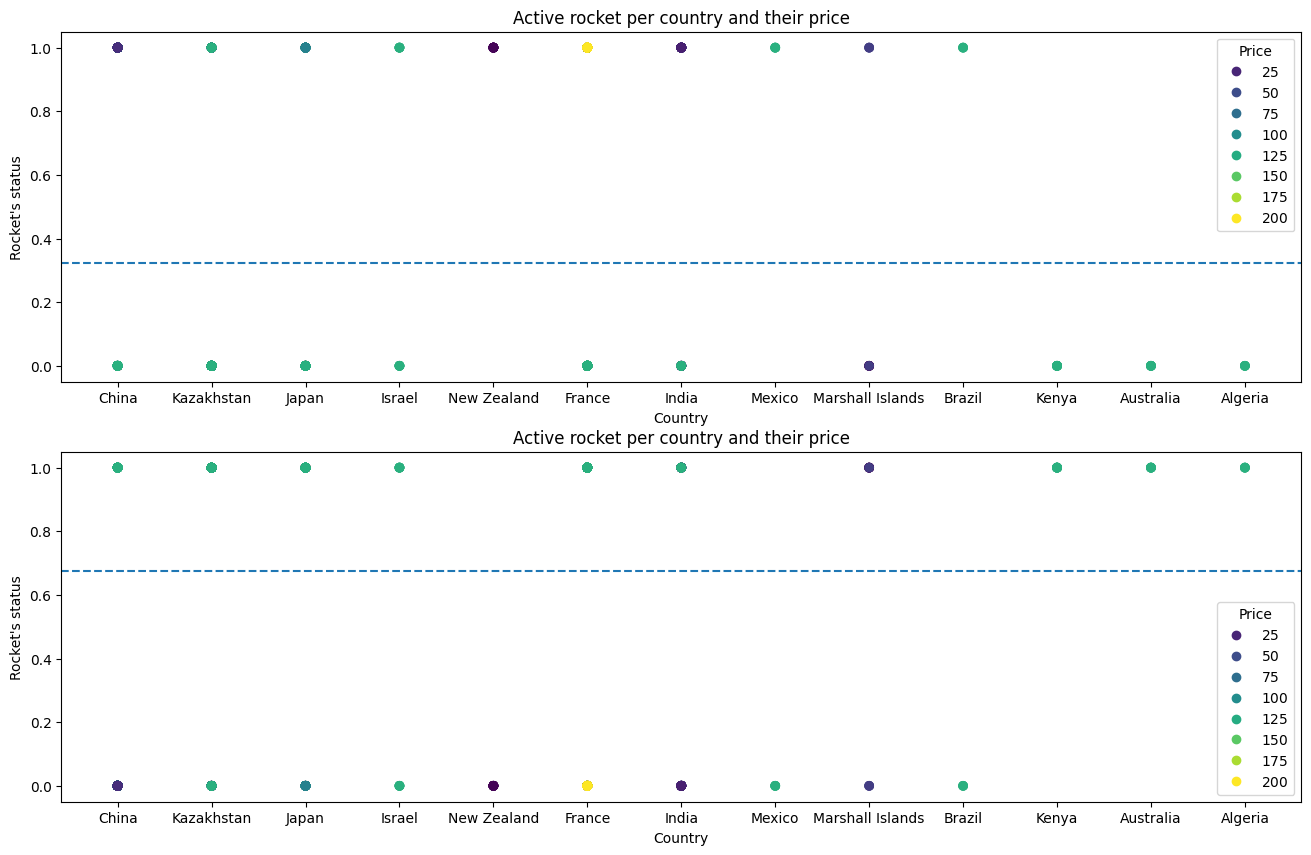

In [93]:
# Digging deeper - useing two polts in one fig also two axis
grouped_per_country_active = df.groupby("country")["StatusActive"].mean().reset_index(name="mean_active")
grouped_per_country_retired = df.groupby("country")["StatusRetired"].mean().reset_index(name="mean_retired")
# Setting the figure and the two plots
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

# Setting the first plot
scatter = ax0.scatter(x=df["country"], y=df["StatusActive"], c=df["price"])

# Customizing ax0
ax0.set(title="Active rocket per country and their price", xlabel="Country", ylabel="Rocket's status")

# Customizing the legend for ax0
ax0.legend(*scatter.legend_elements(), title="Price")

# Add a mean line
ax0.axhline(y=df["StatusActive"].mean(), linestyle="--")


#setting th 2nd plott
# Setting the first plot
scatter = ax1.scatter(x=df["country"], y=df["StatusRetired"], c=df["price"])

# Customizing ax0
ax1.set(title="Scatter Os the Active rocket per country and their price in millions", xlabel="Country", ylabel="Rocket's status")

# Customizing the legend for ax0
ax1.legend(*scatter.legend_elements(), title="Price")

# Add a mean line
ax1.axhline(y=df["StatusRetired"].mean(), linestyle="--")

#These plots originate from a code that calculates the total number of launches, the percentage of launches for each organization, and filters out 
#organizations with less than 1% of total launches. It then creates a new DataFrame with the filtered organizations, 
#groups them by organization, and counts the number of launches. The cost per launch is then calculated for each organization,
# and the results are sorted in descending order. Finally, a bar chart is created using Plotly Express to visualize the cost per launch for each organization.

In [94]:
# query to know how often the organisations appear on the Data Frame
display(df["organisation"].value_counts())


RVSN USSR           579
Arianespace         279
CASC                250
MHI                  84
ISRO                 76
Roscosmos            47
VKS RF               44
ISAS                 30
ESA                  13
Rocket Lab           13
Kosmotras            12
IAI                  11
ExPace               10
ASI                   9
CNES                  8
Land Launch           7
JAXA                  7
ILS                   6
SpaceX                5
CASIC                 5
UT                    5
CECLES                4
Exos                  4
Northrop              4
Arm??e de l'Air       4
AEB                   3
RAE                   2
OKB-586               2
i-Space               1
AMBA                  1
Yuzhmash              1
Landspace             1
Starsem               1
OneSpace              1
ULA                   0
Douglas               0
US Navy               0
US Air Force          0
Sandia                0
Boeing                0
Blue Origin           0
Virgin Orbit    

In [96]:
# getting a Outcome colum for categorical data repository
df['Outcome'] = df['Success'].apply(lambda x: 1 if x == 1 else 0)

display(df)

,launches,organisation,date,price,country,Failure,Success,StatusActive,StatusRetired,Outcome
1,1,CASC,"Thu Aug 06, 2020 04:01 UTC",29,China,0,1,1,0,1
3,3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",65,Kazakhstan,0,1,1,0,1
5,5,CASC,"Sat Jul 25, 2020 03:13 UTC",64,China,0,1,1,0,1
6,6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",48,Kazakhstan,0,1,1,0,1
7,7,CASC,"Thu Jul 23, 2020 04:41 UTC",129,China,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4301,4301,RVSN USSR,"Tue Sep 23, 1958 07:40 UTC",129,Kazakhstan,1,0,0,1,0
4313,4313,RVSN USSR,"Thu May 15, 1958 07:12 UTC",129,Kazakhstan,0,1,0,1,1
4315,4315,RVSN USSR,"Sun Apr 27, 1958 09:01 UTC",129,Kazakhstan,1,0,0,1,0
4322,4322,RVSN USSR,"Sun Nov 03, 1957 02:30 UTC",129,Kazakhstan,0,1,0,1,1


## Looking into Private companies versus Estate owned ones

In [97]:

# Define list of private launch companies
private_launch_companies = ['SpaceX', 'Blue Origin', 'Rocket Lab', 'Virgin Orbit', 'Firefly Aerospace', 'Relativity Space', 'Astra Space', 'Orbex', 'Vector Launch', 'Launcher', 'PLD Space', 'Skyrora', 'OneSpace', 'iSpace', 'Gilmour Space Technologies', 'Hyperion Technologies', 'Interstellar Technologies']


In [98]:
# Create a dataframe called private_launches with successful private launches
private_launches = df[(df['organisation'].isin(private_launch_companies))]
# Create a dataframe called state_launches with successful state launches
state_launches = df[(~df['organisation'].isin(private_launch_companies))]

# Create a dataframe called private_org with the number of launches per private company
# We count the number of launches per company and rename the column as "counts"
private_org = private_launches.groupby('organisation').size().reset_index(name='counts')

# Create a dataframe called state_org with the number of launches per state
# We count the number of launches per state and rename the column as "counts"
state_org = state_launches.groupby('country').size().reset_index(name='counts')


In [99]:
state_success_rate = state_launches['Outcome'].sum() / len(state_launches['Outcome']) * 100
private_success_rate = private_launches['Outcome'].sum() / len(private_launches['Outcome']) * 100


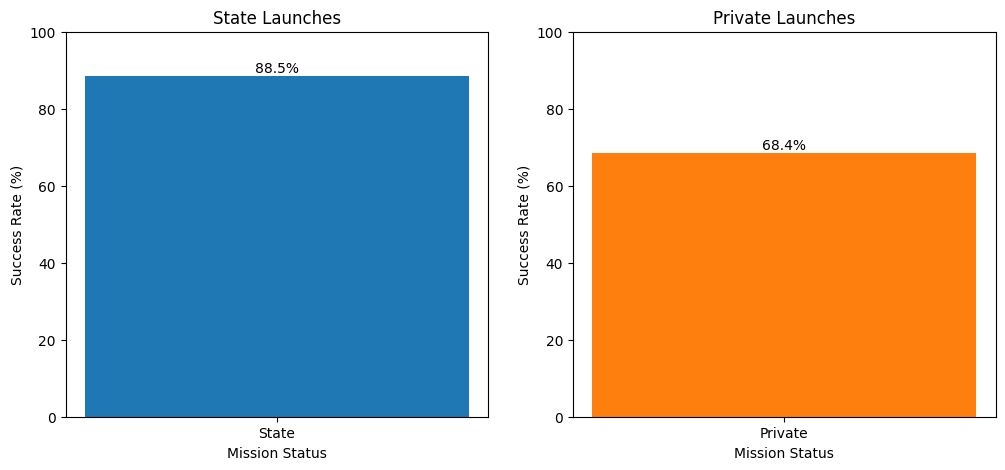

In [100]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

state_success_rate = state_launches['Success'].sum() / len(state_launches['Success']) * 100
private_success_rate = private_launches['Success'].sum() / len(private_launches['Success']) * 100

axs[0].bar(['State'], [state_success_rate], color='C0')
axs[0].set_title('State Launches')
axs[0].set_ylim([0, 100])
axs[0].set_xlabel('Mission Status')
axs[0].set_ylabel('Success Rate (%)')
for i, v in enumerate([state_success_rate]):
    axs[0].text(i, v+1, f'{v:.1f}%', ha='center')

axs[1].bar(['Private'], [private_success_rate], color='C1')
axs[1].set_title('Private Launches')
axs[1].set_ylim([0, 100])
axs[1].set_xlabel('Mission Status')
axs[1].set_ylabel('Success Rate (%)')
for i, v in enumerate([private_success_rate]):
    axs[1].text(i, v+1, f'{v:.1f}%', ha='center')

plt.show()




In [101]:
# Calculate success and failure rates for each organization
organisation_success_rate = df.groupby("organisation")["Success"].sum() / df.groupby("organisation")["Success"].count() * 100
organisation_failure_rate = df.groupby("organisation")["Failure"].sum() / df.groupby("organisation")["Failure"].count() * 100

# Filter out organizations with success and failure rates below 1%
mask = (organisation_success_rate > 1) & (organisation_failure_rate > 1)
organisation_success_rate = organisation_success_rate[mask]
organisation_failure_rate = organisation_failure_rate[mask]

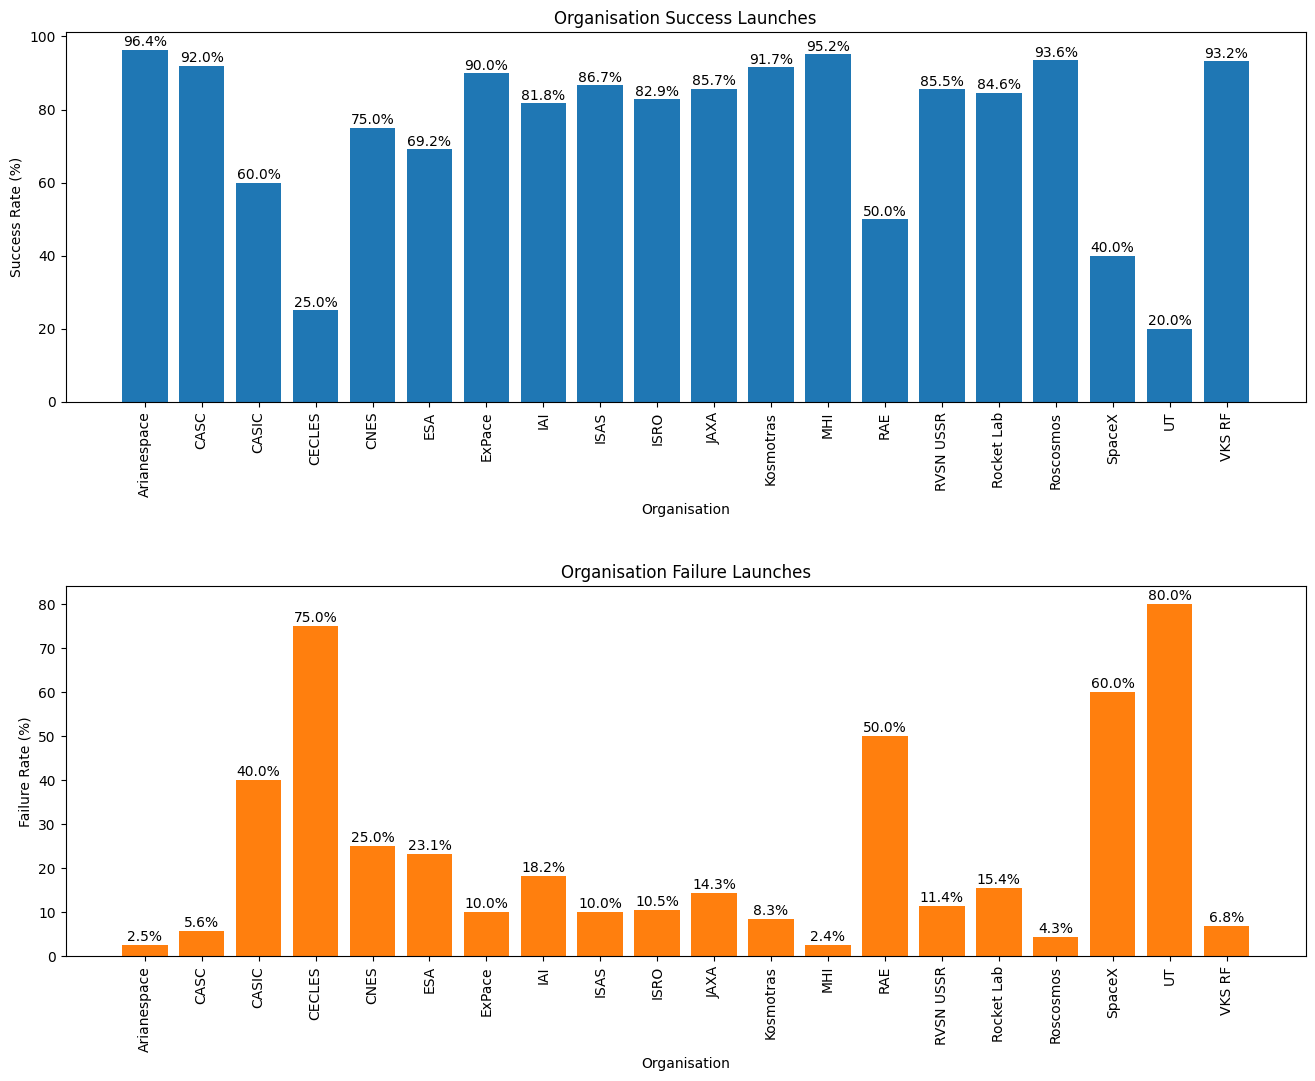

In [102]:
# Create subplots for success and failure rates
fig, axs = plt.subplots(2, 1, figsize=(16, 12))

# Plot success rates per organization
axs[0].bar(organisation_success_rate.index, organisation_success_rate, color='C0')
axs[0].set_title('Organisation Success Launches')
axs[0].set_xlabel('Organisation')
axs[0].set_ylabel('Success Rate (%)')
axs[0].tick_params(axis='x', labelrotation=90)
for i, v in enumerate(organisation_success_rate.values):
    axs[0].text(i, v+1, f'{v:.1f}%', ha='center')

# Plot failure rates per organization
axs[1].bar(organisation_failure_rate.index, organisation_failure_rate, color='C1')
axs[1].set_title('Organisation Failure Launches')
axs[1].set_xlabel('Organisation')
axs[1].set_ylabel('Failure Rate (%)')
axs[1].tick_params(axis='x', labelrotation=90)
for i, v in enumerate(organisation_failure_rate.values):
    axs[1].text(i, v+1, f'{v:.1f}%', ha='center')

plt.subplots_adjust(hspace=0.5)
plt.show()


In [129]:

display(df)

,launches,organisation,date,price,country,Failure,Success,StatusActive,StatusRetired,Outcome,Year
1,1,CASC,2020-08-06 04:01:00+00:00,29,China,0,1,1,0,1,2020
3,3,Roscosmos,2020-07-30 21:25:00+00:00,65,Kazakhstan,0,1,1,0,1,2020
5,5,CASC,2020-07-25 03:13:00+00:00,64,China,0,1,1,0,1,2020
6,6,Roscosmos,2020-07-23 14:26:00+00:00,48,Kazakhstan,0,1,1,0,1,2020
7,7,CASC,2020-07-23 04:41:00+00:00,129,China,0,1,1,0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
4301,4301,RVSN USSR,1958-09-23 07:40:00+00:00,129,Kazakhstan,1,0,0,1,0,1958
4313,4313,RVSN USSR,1958-05-15 07:12:00+00:00,129,Kazakhstan,0,1,0,1,1,1958
4315,4315,RVSN USSR,1958-04-27 09:01:00+00:00,129,Kazakhstan,1,0,0,1,0,1958
4322,4322,RVSN USSR,1957-11-03 02:30:00+00:00,129,Kazakhstan,0,1,0,1,1,1957


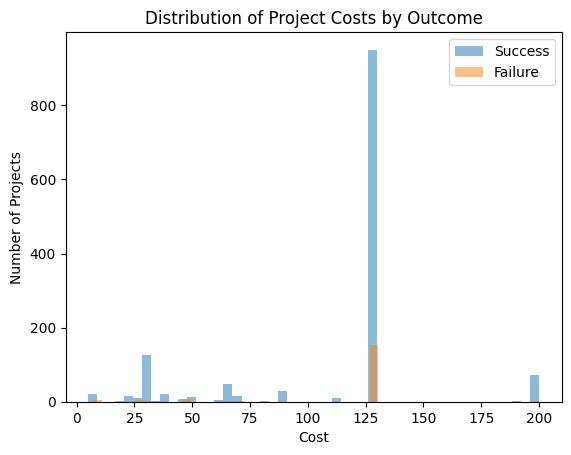

In [136]:
# Create a histogram of the costs for successful and unsuccessful projects
plt.hist(df.loc[df['Outcome'] == 1, 'price'].dropna(), bins=50, alpha=0.5, label='Success')
plt.hist(df.loc[df['Outcome'] == 0, 'price'].dropna(), bins=50, alpha=0.5, label='Failure')

# Set the title and axis labels
plt.title('Distribution of Project Costs by Outcome')
plt.xlabel('Cost')
plt.ylabel('Number of Projects')

# Add a legend
plt.legend()

# Show the plot
plt.show()








In [137]:
display(df)

,launches,organisation,date,price,country,Failure,Success,StatusActive,StatusRetired,Outcome,Year
1,1,CASC,2020-08-06 04:01:00+00:00,29,China,0,1,1,0,1,2020
3,3,Roscosmos,2020-07-30 21:25:00+00:00,65,Kazakhstan,0,1,1,0,1,2020
5,5,CASC,2020-07-25 03:13:00+00:00,64,China,0,1,1,0,1,2020
6,6,Roscosmos,2020-07-23 14:26:00+00:00,48,Kazakhstan,0,1,1,0,1,2020
7,7,CASC,2020-07-23 04:41:00+00:00,129,China,0,1,1,0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
4301,4301,RVSN USSR,1958-09-23 07:40:00+00:00,129,Kazakhstan,1,0,0,1,0,1958
4313,4313,RVSN USSR,1958-05-15 07:12:00+00:00,129,Kazakhstan,0,1,0,1,1,1958
4315,4315,RVSN USSR,1958-04-27 09:01:00+00:00,129,Kazakhstan,1,0,0,1,0,1958
4322,4322,RVSN USSR,1957-11-03 02:30:00+00:00,129,Kazakhstan,0,1,0,1,1,1957


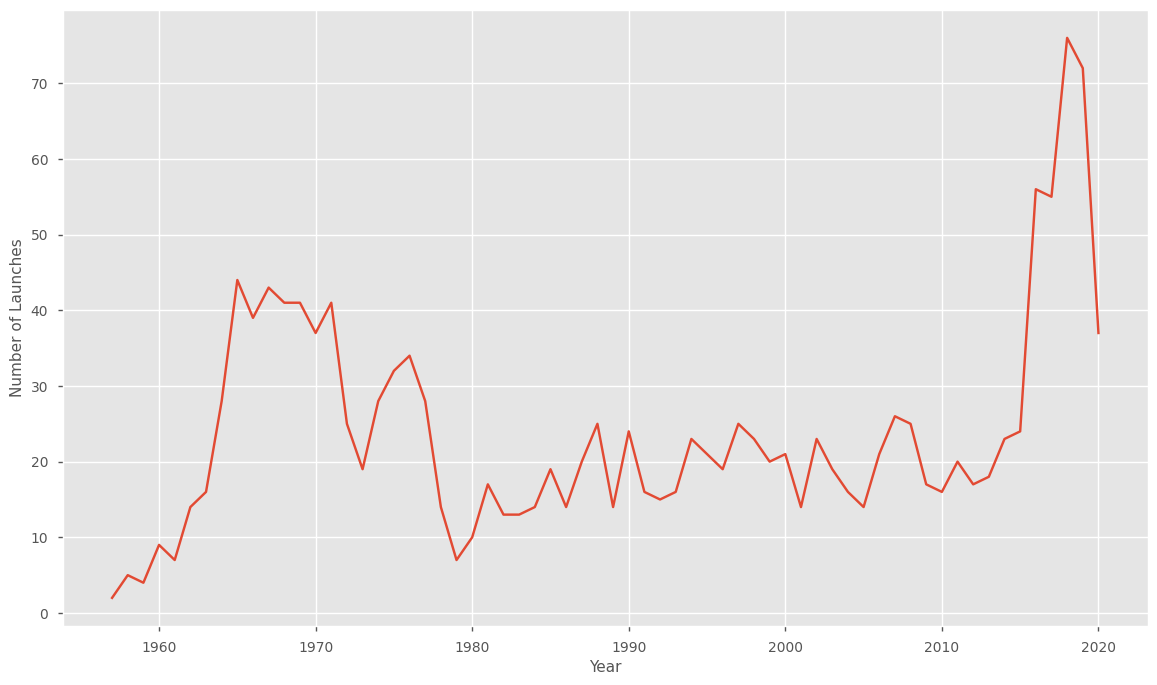

In [151]:
#other aspect that must be taken in place is the temporal issue, comparing evolution of time and number of launches
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(14,8))
# Convert the 'Datum' column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'])

# Group the data by year and count the number of launches per year
launches_per_year = df.groupby(df['date'].dt.year)['Outcome'].count()

# Plot the number of launches per year as a line plot
plt.plot(launches_per_year.index, launches_per_year.values)

# Set the x-label and y-label
plt.xlabel('Year')
plt.ylabel('Number of Launches')

# Show the plot
plt.show()


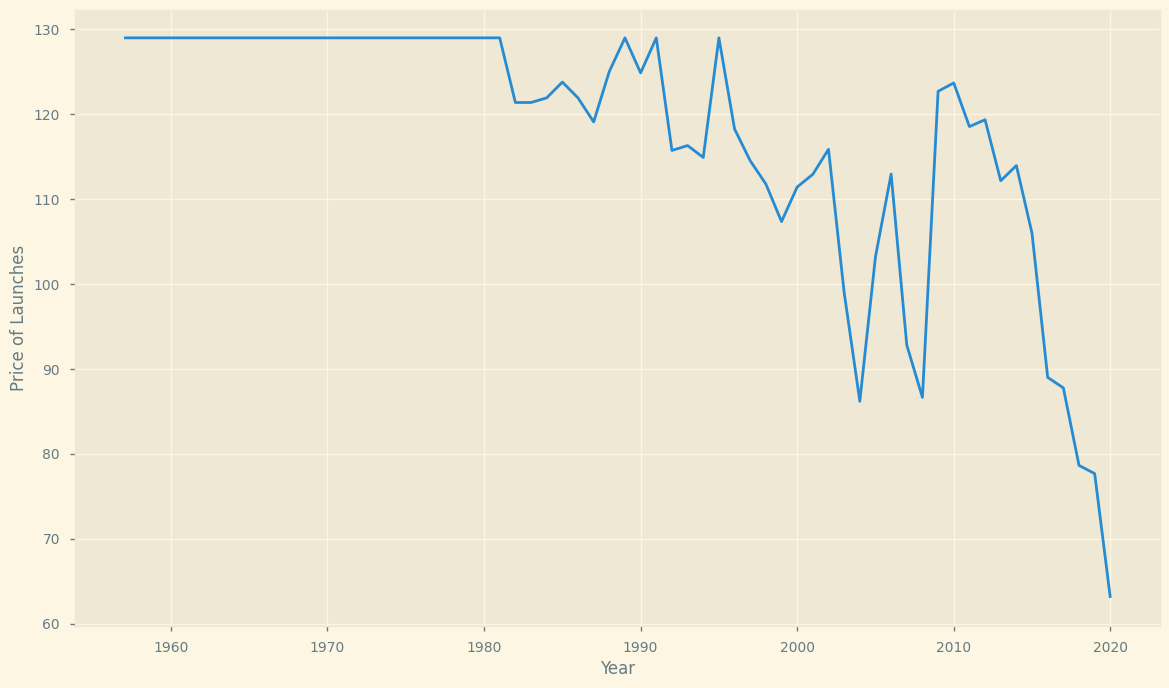

In [156]:
#other aspect that must be taken in place is the temporal issue, comparing evolution of time and number of launches
plt.style.use('Solarize_Light2')
fig = plt.figure(figsize=(14,8))
# Convert the 'Datum' column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'])

# Group the data by year and count the number of launches per year
launches_per_year = df.groupby(df['date'].dt.year)['price'].mean()

# Plot the number of launches per year as a line plot
plt.plot(launches_per_year.index, launches_per_year.values)

# Set the x-label and y-label
plt.xlabel('Year')
plt.ylabel('Price of Launches')

# Show the plot
plt.show()


In [168]:
#using the previwed parameters we can assure the fact that not all the organisations are cost effective


# Group the data by organization
org_data = df.groupby('organisation')

# Calculate the number of launches per organization
launch_count = org_data.size().reset_index(name='Launch Count')

# Calculate the success rate per organization
success_rate = org_data['Outcome'].apply(lambda x: (x == 1).sum() / len(x)).reset_index(name='Success Rate')

# Calculate the average cost per launch per organization
avg_cost_per_launch = org_data['price'].sum() / org_data['price'].count()
avg_cost_per_launch = avg_cost_per_launch.reset_index(name='Average Cost per Launch')

# Merge the launch count, success rate, and average cost per launch data
org_summary = pd.merge(launch_count, success_rate, on='organisation')
org_summary = pd.merge(org_summary, avg_cost_per_launch, on='organisation')

# Sort the data by success rate and average cost per launch
org_summary = org_summary.sort_values(['Success Rate', 'Average Cost per Launch'], ascending=[False, True])

# Display the summary table
display(org_summary.head(20))

C:\Users\Diego S V de Brito\AppData\Local\Temp\ipykernel_21212\912800844.py:11: RuntimeWarning:

invalid value encountered in longlong_scalars



,organisation,Launch Count,Success Rate,Average Cost per Launch
36,Northrop,4,1.000000,40.000000
1,AMBA,1,1.000000,129.000000
2,ASI,9,1.000000,129.000000
37,OKB-586,2,1.000000,129.000000
47,Starsem,1,1.000000,129.000000
54,Yuzhmash,1,1.000000,129.000000
55,i-Space,1,1.000000,129.000000
3,Arianespace,279,0.964158,143.193548
32,MHI,84,0.952381,114.178571
42,Roscosmos,47,0.936170,96.425532


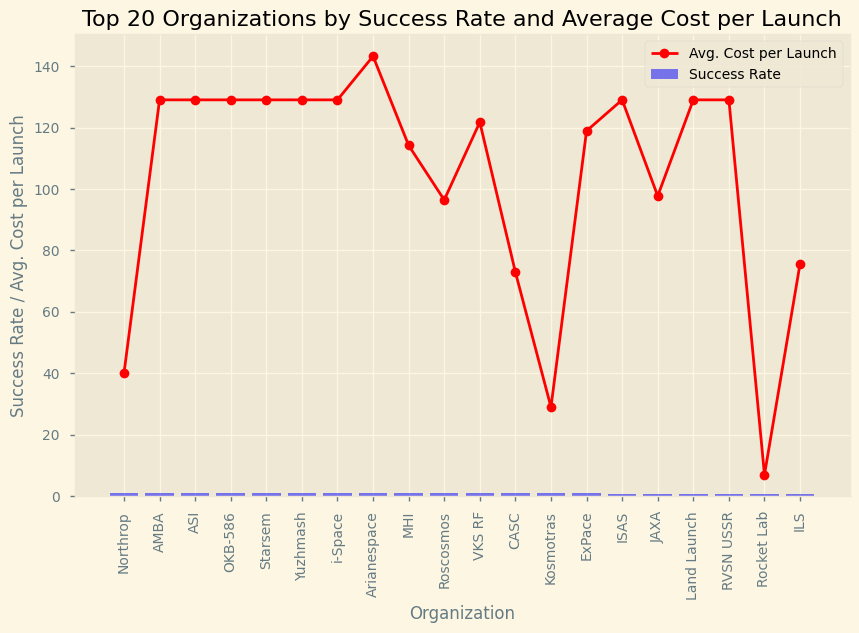

In [169]:
# let us look int cost effectiveness 

top_orgs = org_summary.head(20)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_orgs['organisation'], top_orgs['Success Rate'], color='b', alpha=0.5, label='Success Rate')
ax.plot(top_orgs['organisation'], top_orgs['Average Cost per Launch'], color='r', marker='o', label='Avg. Cost per Launch')
ax.set_xlabel('Organization')
ax.set_ylabel('Success Rate / Avg. Cost per Launch')
ax.set_title('Top 20 Organizations by Success Rate and Average Cost per Launch')
ax.legend()
plt.xticks(rotation=90)
plt.show()


1           China
3      Kazakhstan
5           China
6      Kazakhstan
7           China
9           Japan
11          China
12          China
13         Israel
14          China
15    New Zealand
16          China
18          China
19          China
21    New Zealand
22          China
24          China
26          China
29          Japan
31          China
32          China
33     Kazakhstan
36          China
37     Kazakhstan
39          China
40     Kazakhstan
43          China
44          China
47          China
48         France
53          Japan
54     Kazakhstan
55    New Zealand
58         France
59          China
60          China
61          China
63          China
65     Kazakhstan
67          China
68         France
70          China
72          India
74          China
75          China
76     Kazakhstan
77    New Zealand
79          China
80          India
81         France
Name: country, dtype: object